In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.mixture import GaussianMixture

C:\Users\rafal\AppData\Local\Temp\ipykernel_17688\265621257.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [6]:
iris = datasets.load_iris()

In [21]:
x = iris.data[:, :2]
d = pd.DataFrame(x)

In [22]:
d

,0,1
0,5.1,3.5
1,4.9,3.0
2,4.7,3.2
3,4.6,3.1
4,5.0,3.6
...,...,...
145,6.7,3.0
146,6.3,2.5
147,6.5,3.0
148,6.2,3.4


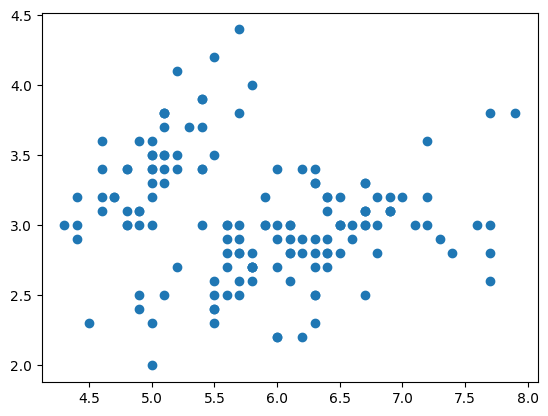

In [9]:
plt.scatter(d[0], d[1])

In [10]:
# fit the data as a mixture of 3 Gaussians
gmm = GaussianMixture(n_components=3)
gmm.fit(d)

GaussianMixture(n_components=3)

In [24]:
# predict the cluster of each data record
labels = gmm.predict(d)
labels

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 0, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 2,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 2, 2, 0, 2, 2, 2,
       2, 0, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 0, 2, 2, 2,
       0, 0, 0, 2, 2, 0, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0], dtype=int64)

In [13]:
# Check if the model has converged
gmm.converged_

True

In [14]:
# number of iterations
gmm.n_iter_

8

In [25]:
# get the final “means” for each cluster
means = gmm.means_

In [16]:
# final std deviations -> covariance matrix
gmm.covariances_

array([[[0.2771913 , 0.0894219 ],
        [0.0894219 , 0.09420707]],

       [[0.11944295, 0.08835036],
        [0.08835036, 0.11895089]],

       [[0.35953784, 0.05092452],
        [0.05092452, 0.08961421]]])

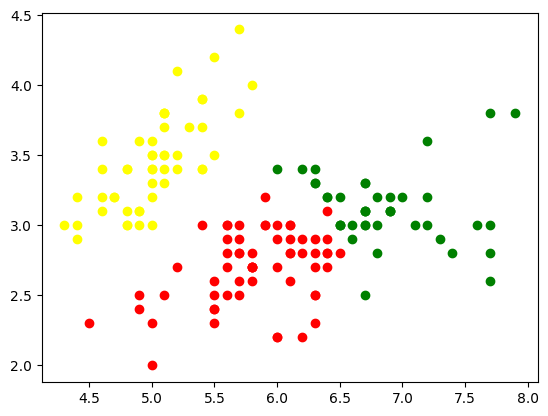

In [26]:
# plot data
d['labels'] = labels
d0 = d[d['labels']== 0]
d1 = d[d['labels']== 1]
d2 = d[d['labels']== 2]
plt.scatter(d0[0], d0[1], c ='r')
plt.scatter(d1[0], d1[1], c ='yellow')
plt.scatter(d2[0], d2[1], c ='g')